In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image=cv2.imread(r"C:\Users\DELL\Desktop\Scan_image_CTI\scan_image1.jpg")
image.shape

(225, 300, 3)

In [4]:
#Preprocessing - resize it so as to reduce the size to scan effectively
image=cv2.resize(image,(300,400))
orig=image.copy()

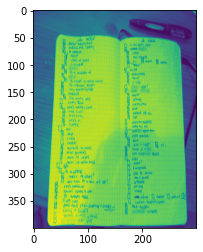

In [6]:
#convert it to gray scale image- as transistion would be smoother
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#cv2.imshow("GrayScale Image",gray)
#cv2.waitKey();
plt.imshow(gray)

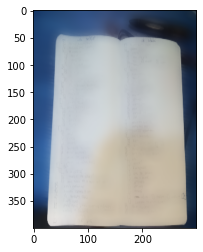

In [7]:
#Applying Gaussian filter - to blur an image
blur=cv2.bilateralFilter(image,30,190,75);
#cv2.imshow("Blurred Image",blur)
#cv2.waitKey();
plt.imshow(blur)

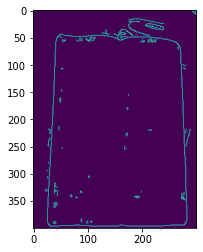

In [8]:
#Using Canny Edge Detector
#Canny(image,minValue,maxValue)
#Any edges with intensity gradient more than maxVal are sure to be edges and those 
#below minVal are sure to be non-edges, so discarded.

edged=cv2.Canny(blur,30,50);
#cv2.imshow("Canny",edged)
#cv2.waitKey();
plt.imshow(edged)

In [9]:
#Extracting boundary/page from an image
#Using- Contours -curve joining all the continuous points (along the boundary), having same color or intensity.
#before finding contours, apply threshold or canny edge detection.
# finding contours is like finding white object from black background. 
#object to be found should be white and background should be black.
contours,hierarchy=cv2.findContours(edged,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)  
#retrieve the contours as a list, with simple apprximation model

#sort it in reverse so that we get big one in the begining of the list -boundary
contours=sorted(contours,key=cv2.contourArea,reverse=True)

In [10]:
#the loop extracts the boundary contours of the page
for c in contours:
    p=cv2.arcLength(c,True) #finding square or closed fig within an contour
    approx=cv2.approxPolyDP(c,0.02*p,True) #approxpolydp to approximate the fig into sq..tune the epsilon value-0.02
    
    #check if its a square
    if len(approx)==4:
        target=approx
        print("yeah")
        break


yeah


In [11]:
#to display the top view of the page-use getPerspectiveTransform which takes two arguments.
#end points of the boundary should be given as a parameter - so can't give countours directly
#Finding end points

def endpoints(h):
    h = h.reshape((4,2))
    hnew = np.zeros((4,2),dtype = np.float32)

    add = h.sum(1)
    hnew[0] = h[np.argmin(add)]
    hnew[2] = h[np.argmax(add)]

    diff = np.diff(h,axis = 1)
    hnew[1] = h[np.argmin(diff)]
    hnew[3] = h[np.argmax(diff)]

    return hnew

In [12]:
approx=endpoints(target)
print(approx)

[[ 44.  49.]
 [262.  59.]
 [279. 391.]
 [ 31. 396.]]


<ipython-input-13-67f8af2c96b0>:1: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  a=cv2.rectangle(edged,tuple(approx[0]),tuple(approx[2]),(255, 0, 0),1)


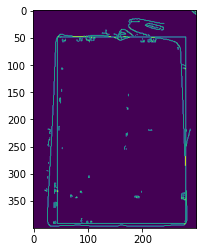

In [13]:
a=cv2.rectangle(edged,tuple(approx[0]),tuple(approx[2]),(255, 0, 0),1)
#cv2.imshow("recty",a)
#cv2.waitKey()
plt.imshow(a)


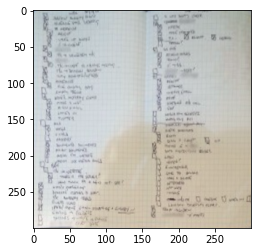

In [16]:
#defining a window to be displayed
pts=np.float32([[0,0],[300,0],[300,300],[0,300]])

#one parameter is the end points and other is the boundary or window 
op=cv2.getPerspectiveTransform(approx,pts)  #get the top or bird eye view effect
dst=cv2.warpPerspective(orig,op,(300,300))


plt.imshow(dst)
#cv2.imshow("Scanned",dst)
# press q or Esc to close
#cv2.waitKey(0)
#cv2.destroyAllWindows()
